In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import allensdk
allensdk.__version__

'2.10.0'

In [4]:
import allensdk.brain_observatory.behavior.behavior_project_cache as bpc

### get experiments to analyze

The VBA <code>data_access</code> module provides useful functions for identifying and loading experiments to analyze. 

In [22]:

my_cache_dir = "/home/danielk/tmp"
bc = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=my_cache_dir)

# the production bucket is set as default:
# bucket_name="visual_behavior_ophys_data"
# project_name="visual-behavior-ophys"

behavior_session_table = bc.get_behavior_session_table()  
session_table = bc.get_session_table()   
experiment_table = bc.get_experiment_table()                         

#print number of items in each table for all imaging and behavioral sessions
print('Number of behavior sessions = {}'.format(len(behavior_session_table)))
print('Number of ophys sessions = {}'.format(len(session_table)))
print('Number of ophys experiments = {}'.format(len(experiment_table)))


#print number of items in each table with Mesoscope imaging
print('Number of behavior sessions with Mesoscope = {}'.format(len(behavior_session_table[behavior_session_table.project_code.isin(['VisualBehaviorMultiscope'])])))
print('Number of ophys sessions with Mesoscope = {}'.format(len(session_table[session_table.project_code.isin(['VisualBehaviorMultiscope'])])))
print('Number of ophys experiments with Mesoscope = {}'.format(len(experiment_table[experiment_table.project_code.isin(['VisualBehaviorMultiscope'])])))



Number of behavior sessions = 3572
Number of ophys sessions = 551
Number of ophys experiments = 1165
Number of behavior sessions with Mesoscope = 133
Number of ophys sessions with Mesoscope = 133
Number of ophys experiments with Mesoscope = 747


Let's see expriment table and pick one to look at

In [23]:
experiment_table.head(10)


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,session_type,cre_line,indicator,...,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,1085394308
951980484,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028351,VisualBehaviorMultiscope,75,VISl,2019-09-20 09:45:29.897856,1085400876
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,1085400919
951980479,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028354,VisualBehaviorMultiscope,150,VISl,2019-09-20 09:45:29.897856,1085400977
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,1085400920
951980481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-20 09:45:29.897856,1085400972
951980486,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,OPHYS_1_images_A,Sst-IRES-Cre,GCaMP6f,...,3.0,0,951410079,951520319,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-20 09:45:29.897856,1085400869
953659752,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,OPHYS_2_images_A_passive,Sst-IRES-Cre,GCaMP6f,...,4.0,1,952430817,952554548,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-23 08:13:07.627573,1086012413
953659745,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,OPHYS_2_images_A_passive,Sst-IRES-Cre,GCaMP6f,...,4.0,1,952430817,952554548,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-23 08:13:07.627573,1086012793


In [ ]:

#bs1 = bc.get_behavior_session(870987812)
#bs2 = bc.get_behavior_session(956010809)
#be1 = bc.get_behavior_ophys_experiment(958741232)

In [43]:
# load an experiment
ophys_experiment_id = 953659749
experiment_dataset = bc.get_behavior_ophys_experiment(ophys_experiment_id)

In [44]:
# Show metadata for this experiment
experiment_dataset.metadata

{'equipment_name': 'MESO.1',
 'stimulus_frame_rate': 60.0,
 'imaging_depth': 150,
 'imaging_plane_group_count': 4,
 'ophys_session_id': 952430817,
 'behavior_session_id': 952554548,
 'session_type': 'OPHYS_2_images_A_passive',
 'ophys_experiment_id': 953659749,
 'experiment_container_id': 1018028354,
 'field_of_view_height': 512,
 'behavior_session_uuid': UUID('67813c87-8b09-4a35-9ebd-d0d34141f253'),
 'field_of_view_width': 512,
 'imaging_plane_group': 2,
 'mouse_id': 457841,
 'sex': 'F',
 'age_in_days': 233,
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'driver_line': ['Sst-IRES-Cre'],
 'cre_line': 'Sst-IRES-Cre',
 'date_of_acquisition': datetime.datetime(2019, 9, 23, 8, 13, 7, tzinfo=tzutc()),
 'ophys_frame_rate': 11.0,
 'indicator': 'GCaMP6f',
 'targeted_structure': 'VISl',
 'excitation_lambda': 910.0,
 'emission_lambda': 520.0}

In [45]:
# show dff traces for this experiment 
experiment_dataset.dff_traces.head(10)

,cell_roi_id,dff
cell_specimen_id,,
1086607768,1080739940,"[0.5551391625650843, 1.78603574623201, 1.47061..."
1086610034,1080739944,"[0.23136659822346706, 0.32380234419537124, 0.2..."
1086606974,1080739949,"[1.7122052822363418, 1.5636142563895477, 0.107..."
1086607071,1080739954,"[0.5326277863664002, 0.1131796405546146, 0.246..."
1086607143,1080739957,"[0.18830056691311947, 0.029803366727099823, 0...."
1086607431,1080739961,"[0.2404003310727527, 0.2065231896741919, 0.244..."
1086607713,1080739964,"[1.0202893672943727, 1.4940481317719425, 3.424..."
1086607903,1080739967,"[0.2959218864422643, 0.0, 0.38880404770216065,..."
1086607562,1080739970,"[0.3963360780309273, 0.21806029798271556, 0.04..."


In [46]:
# show dff traces for this experiment 
experiment_dataset.events.head(10)

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086607768,1080739940,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.4905,0.217203
1086610034,1080739944,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1177,0.106383
1086606974,1080739949,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.8273,0.421375
1086607071,1080739954,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1490,0.120165
1086607143,1080739957,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0739,0.084353
1086607431,1080739961,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0937,0.094828
1086607713,1080739964,"[0.0, 0.0, 1.1792743658146179, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.39222486389986094, 0.346137227508...",0.6243,0.246269
1086607903,1080739967,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1035,0.099608
1086607562,1080739970,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0520,0.070992


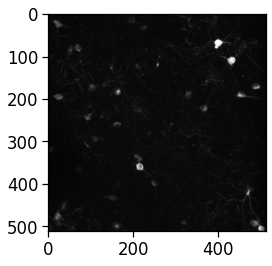

In [47]:
# Plot max projection from this experiment
plt.imshow(experiment_dataset.max_projection, cmap='gray')

In [49]:
# get all Sst experiments for ophys session 4
experiments_to_analyze = experiment_table[(experiment_table.cre_line=='Sst-IRES-Cre')&
                 (experiment_table.session_number==4)]
print(len(experiments_to_analyze))

33


In [50]:
# Load dataset dff traces an array
dff_array = np.vstack(dataset.dff_traces.dff.values)
dff_array.shape

(23, 48332)

In [51]:
# Load ophys timestamps
dataset.ophys_timestamps

array([   9.65504,    9.74825,    9.84147, ..., 4515.4854 , 4515.57863,
       4515.67187])

In [55]:
# load cell specimen table with cell metrics
experiment_dataset.cell_specimen_table.head(5)

,cell_roi_id,height,mask_image_plane,max_correction_down,max_correction_left,max_correction_right,max_correction_up,valid_roi,width,x,y,roi_mask
cell_specimen_id,,,,,,,,,,,,
1086607768,1080739940,35,0,5.0,6.0,4.0,8.0,True,21,15,464,"[[False, False, False, False, False, False, Fa..."
1086610034,1080739944,12,0,5.0,6.0,4.0,8.0,True,17,311,485,"[[False, False, False, False, False, False, Fa..."
1086606974,1080739949,18,0,5.0,6.0,4.0,8.0,True,17,207,352,"[[False, False, False, False, False, False, Fa..."
1086607071,1080739954,21,0,5.0,6.0,4.0,8.0,True,20,84,234,"[[False, False, False, False, False, False, Fa..."
1086607143,1080739957,14,0,5.0,6.0,4.0,8.0,True,21,152,255,"[[False, False, False, False, False, False, Fa..."


In [57]:
# pick a cell and plot the traces
cell_specimen_ids = dataset.cell_specimen_table.index.values
cell_specimen_id = cell_specimen_ids[5]
print('Cell specimen id = {}'.format(cell_specimen_id))

Cell specimen id = 1086607431


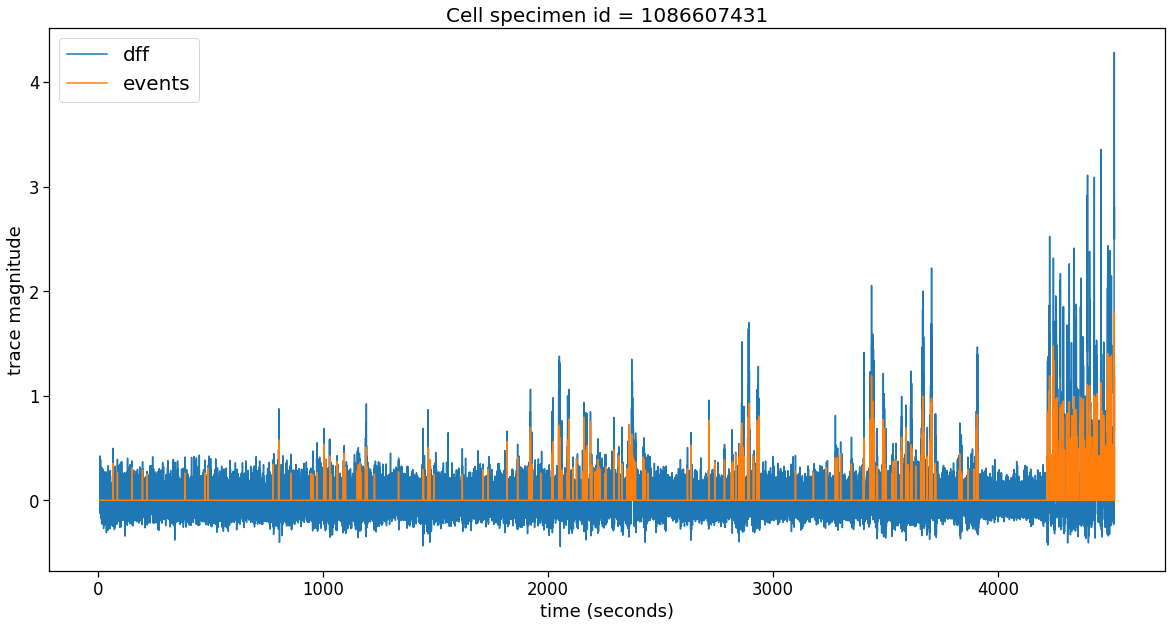

In [71]:
# plot dff and events traces overlaid from one cell
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.plot(dataset.ophys_timestamps, dataset.dff_traces.loc[cell_specimen_id, 'dff'])
ax.plot(dataset.ophys_timestamps, dataset.events.loc[cell_specimen_id, 'events'])
ax.set_xlabel('time (seconds)')
ax.set_ylabel('trace magnitude')
ax.set_title('Cell specimen id = {}'.format(cell_specimen_id), fontsize = 20)
ax.legend(['dff', 'events'], fontsize = 20)


Text(0.5, 1.0, 'Ophys experiment 953659749')

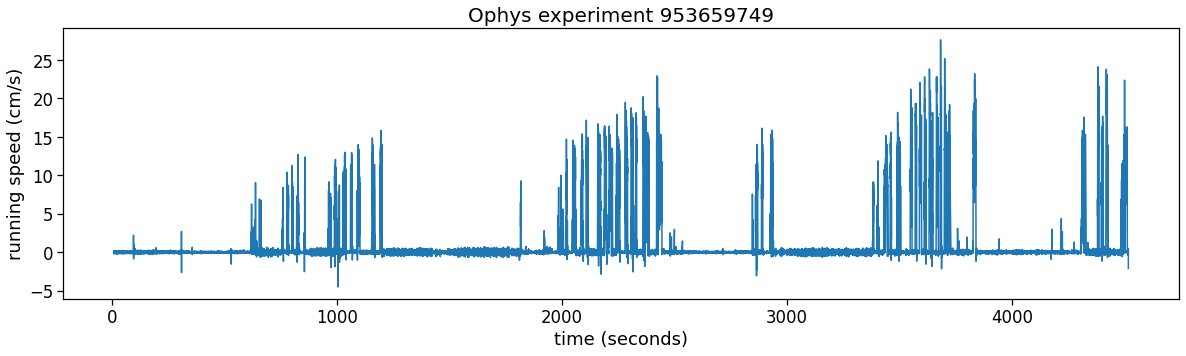

In [81]:
# plot mouse running speed from this experiment
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(dataset.stimulus_timestamps, dataset.running_speed['speed'])
ax.set_xlabel('time (seconds)')
ax.set_ylabel('running speed (cm/s)')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

Text(0.5, 1.0, 'Ophys experiment 953659749')

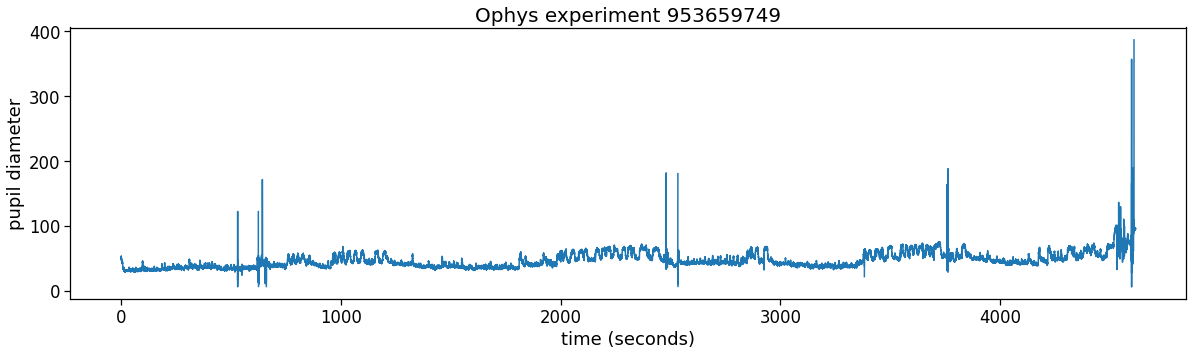

In [80]:
# plot pupil diameter for the same experiment
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(experiment_dataset.eye_tracking.timestamps, experiment_dataset.eye_tracking.pupil_width)
ax.set_xlabel('time (seconds)')
ax.set_ylabel('pupil diameter')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

Large spikes in the trace can be due to blinking. They can be smoothed or filtered.

[nan nan nan ... nan nan nan]


Text(0.5, 1.0, 'Ophys experiment 953659749')

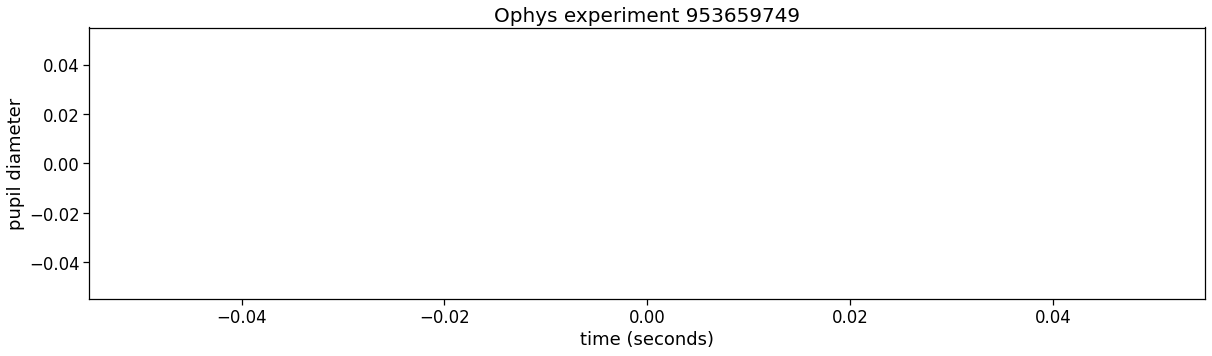

In [88]:
## this is not working right now can be excluded. 
import scipy.signal as signal
b, a = signal.butter(2,.2)
smoothed_pupil_diameter = signal.filtfilt(b, a, experiment_dataset.eye_tracking.pupil_width,)
print(smoothed_pupil_diameter)
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(experiment_dataset.eye_tracking.timestamps, smoothed_pupil_diameter)
ax.set_xlabel('time (seconds)')
ax.set_ylabel('pupil diameter')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

#### Get information about stimuli presented on each trial

In [92]:
# get stimulus information for this experiment and assign it to a table called "stimulus_table"
stimulus_table = experiment_dataset.stimulus_presentations
stimulus_table.head(10)

,duration,end_frame,image_index,image_name,image_set,index,omitted,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,
0,0.25023,18002.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,0,False,17987,309.65357,309.90380
1,0.25000,NaN,8,omitted,omitted,0,True,18031,310.38755,310.63755
2,0.25021,18092.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,1,False,18077,311.15483,311.40504
3,0.25019,18137.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,2,False,18122,311.90545,312.15564
4,0.25020,18182.0,3,im061,Natural_Images_Lum_Matched_set_training_2017.0...,3,False,18167,312.65605,312.90625
5,0.25019,18227.0,3,im061,Natural_Images_Lum_Matched_set_training_2017.0...,4,False,18212,313.40666,313.65685
6,0.25013,18272.0,3,im061,Natural_Images_Lum_Matched_set_training_2017.0...,5,False,18257,314.15735,314.40748
7,0.25020,18317.0,3,im061,Natural_Images_Lum_Matched_set_training_2017.0...,6,False,18302,314.90789,315.15809
8,0.25019,18362.0,3,im061,Natural_Images_Lum_Matched_set_training_2017.0...,7,False,18347,315.65850,315.90869


In [97]:
print('This experiment had {} stimuli.'.format(len(stimulus_table)))
print('Out of all stimuli presented, {} were omitted.'.format(len(stimulus_table[stimulus_table['image_name']=='omitted'])))


This experiment had 4803 stimuli.
Out of all stimuli presented, 202 were omitted.


In [103]:
# You can also use "keys()" method to see the names of the columns in stimulus table
stimulus_table.keys()

Index(['duration', 'end_frame', 'image_index', 'image_name', 'image_set',
       'index', 'omitted', 'start_frame', 'start_time', 'stop_time'],
      dtype='object')

In [102]:
# behavioral trial information
experiment_dataset.trials.head(10)

,start_time,stop_time,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,...,catch,auto_rewarded,correct_reject,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name
trials_id,,,,,,,,,,,,,,,,,,,,,
0,309.63690,316.90953,[],NaN,0,False,False,True,True,False,...,False,False,False,7.27263,NaN,18166,312.675363,inf,im065,im061
1,317.14305,327.41813,[],NaN,0,False,False,True,True,False,...,False,False,False,10.27508,NaN,18796,323.183953,inf,im061,im077
2,327.65164,335.69155,[],NaN,0,False,False,True,True,False,...,False,False,False,8.03991,NaN,19291,331.440703,inf,im077,im066
3,335.90841,346.18346,[],NaN,0,False,False,True,True,False,...,False,False,False,10.27505,NaN,19921,341.949313,inf,im066,im061
4,346.41697,353.70628,[],NaN,0,False,False,True,True,False,...,False,False,False,7.28931,NaN,20371,349.455433,inf,im061,im085
5,353.93982,361.96303,[],NaN,0,False,False,True,True,False,...,False,False,False,8.02321,NaN,20867,357.728853,inf,im085,im069
6,362.19655,369.45249,[],NaN,0,False,False,True,True,False,...,False,False,False,7.25594,NaN,21317,365.234993,inf,im069,im062
7,369.70270,377.72590,[],NaN,0,False,False,False,False,False,...,True,False,True,8.02320,NaN,21812,373.491773,inf,im062,im062
8,377.95945,387.46719,[],NaN,0,False,False,True,True,False,...,False,False,False,9.50774,NaN,22397,383.249723,inf,im062,im065


### ResponseAnalysis class provides access to time aligned cell responses for trials, stimuli, and omissions

VBA also has useful functionality for creating data frames with cell traces aligned to the time of stimulus presentations, omissions, or behavioral trials. 

In [30]:
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

In [31]:
help(ResponseAnalysis)

Help on class ResponseAnalysis in module visual_behavior.ophys.response_analysis.response_analysis:

class ResponseAnalysis(builtins.object)
 |  ResponseAnalysis(dataset, analysis_cache_dir=None, load_from_cache=False, use_events=False, use_extended_stimulus_presentations=False, overwrite_analysis_files=False, dataframe_format='wide')
 |  
 |  Contains methods for organizing cell responses by trials, stimulus presentations, or omissions in a DataFrame.
 |  
 |  For each trial, stimulus presentation, or omission, a segment of the dF/F trace (or events if available and use_events=True) is extracted for each cell aligned to the time of the relevant event (ex: at the change time for each trial).
 |  The duration of each trace segment is a window around the event time, with default values for trials = [-5,5], stimulus presentations = [-0.5,0.75], and omissions = [-5,5].
 |  The mean_response for each cell is taken in a 500ms window after the change time or stimulus onset time, or in a 750ms

In [32]:
# initialize class
analysis = ResponseAnalysis(dataset, # provide dataset object
                            use_events=False, # set to True if you want events
                            use_extended_stimulus_presentations=False) # set to True if you want extra columns  

### Get cell traces for all stimulus presentations 

In [33]:
# this creates a dataframe with the response of every cell for every stimulus presentation
# cell response is a snippet of the trace in a [-.5, 0.75] second window around stim onset
stim_response_df = analysis.get_response_df(df_name='stimulus_response_df')

C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
stim_response_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,epoch
0,0,992902634,"[0.030777270517727537, -0.028265900667685907, ...","[-0.4847625458182987, -0.4524450427637455, -0....",0.025579,-0.017779,0.0932,0.0314,0.2594,0.25022,18001.0,0,im065,False,17986,305.870178,306.120398,False,0
1,0,992902619,"[-0.09817557571738311, -0.0614228314889473, -0...","[-0.4847625458182987, -0.4524450427637455, -0....",0.025675,0.072043,0.1705,0.1269,0.1775,0.25022,18001.0,0,im065,False,17986,305.870178,306.120398,False,0
2,0,992902622,"[0.0001706995323889418, -0.12157291399546681, ...","[-0.4847625458182987, -0.4524450427637455, -0....",0.016921,-0.019611,0.2379,0.0639,0.4315,0.25022,18001.0,0,im065,False,17986,305.870178,306.120398,False,0
3,0,992902667,"[-0.009855721190371858, 0.0304049021414319, 0....","[-0.4847625458182987, -0.4524450427637455, -0....",0.005435,0.021681,0.3806,0.1978,0.4960,0.25022,18001.0,0,im065,False,17986,305.870178,306.120398,False,0
4,0,992902649,"[-0.06964146566402062, 0.06743697233314155, -0...","[-0.4847625458182987, -0.4524450427637455, -0....",-0.010310,-0.052846,0.7312,0.4444,0.8052,0.25022,18001.0,0,im065,False,17986,305.870178,306.120398,False,0


In [35]:
stim_response_df.keys() 

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_gray_screen', 'p_value_omission', 'p_value_stimulus',
       'duration', 'end_frame', 'image_index', 'image_name', 'omitted',
       'start_frame', 'start_time', 'stop_time', 'change', 'epoch'],
      dtype='object')

#### plot single trial response for some cell

Text(0, 0.5, 'dF/F')

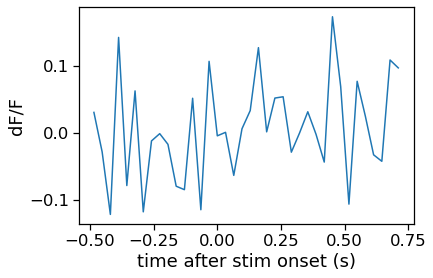

In [36]:
cell_specimen_id = stim_response_df.cell_specimen_id.unique()[0]

trace = stim_response_df[stim_response_df.cell_specimen_id==cell_specimen_id].trace.values[0]
times = stim_response_df[stim_response_df.cell_specimen_id==cell_specimen_id].trace_timestamps.values[0]

plt.plot(times, trace)
plt.xlabel('time after stim onset (s)')
plt.ylabel('dF/F')

#### plot trial averaged trace for some image

Text(0, 0.5, 'dF/F')

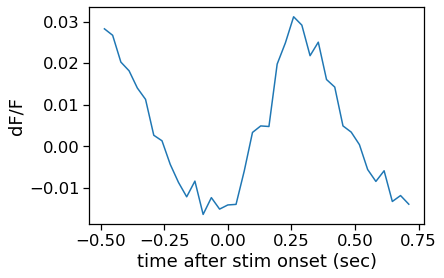

In [37]:
image_name = stim_response_df.image_name.unique()[6]
mean_trace = stim_response_df[(stim_response_df.cell_specimen_id==cell_specimen_id)&
                         (stim_response_df.image_name==image_name)].trace.mean()

plt.plot(times, mean_trace)
plt.xlabel('time after stim onset (sec)')
plt.ylabel('dF/F')


#### responsiveness

Response dataframes include other useful columns including <code>p_value_gray_screen</code> which compares the mean response for each trial to a shuffled distribution of values from the 5 min gray screen periods at the beginning and end of the session.

In [38]:
cell_data = stim_response_df[(stim_response_df.cell_specimen_id==cell_specimen_id)]
fraction_responsive = cell_data.p_value_gray_screen.mean()
print('this cell had a significant response for',fraction_responsive,'of all image presentations')

this cell had a significant response for 0.42011704521775367 of all image presentations


<code>p_value_omission</code> compares the mean response for each trial to a shuffled distribution of all omission responses

<code>p_value_stimulus</code> compares the mean response for each trial to a shuffled distribution of all other stimulus responses

### Get cell responses around change times for behavioral trials

In [39]:
# this creates a dataframe with the response of every cell for every behavioral trial (change and catch)
# cell response is a snippet of the trace in a [-5, 5] second window around change or catch time
trials_response_df = analysis.get_response_df(df_name='trials_response_df')

In [40]:
trials_response_df.head()

,trials_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,lick_times,...,stop_time,trial_length,behavioral_response_time,change_frame,change_time,behavioral_response_latency,initial_image_name,change_image_name,epoch,trial_type
0,1,992902634,"[-0.03815074026421763, 0.003048901828476412, 0...","[-4.9768954704012, -4.944577967346647, -4.9122...",0.002761,-0.015726,0.4574,0.2387,0.5810,"[312.93787406089467, 313.13803840090236, 313.2...",...,316.819476,8.757088,NaN,18390.0,312.625698,0.312176,im065,im077,0,auto_rewarded
1,1,992902619,"[0.09641908108815547, 0.09690868402531017, -0....","[-4.9768954704012, -4.944577967346647, -4.9122...",0.025997,-0.005630,0.1735,0.1118,0.1658,"[312.93787406089467, 313.13803840090236, 313.2...",...,316.819476,8.757088,NaN,18390.0,312.625698,0.312176,im065,im077,0,auto_rewarded
2,1,992902622,"[0.17414409762475988, 0.007017562703841254, 0....","[-4.9768954704012, -4.944577967346647, -4.9122...",-0.031675,-0.036975,0.9626,0.6955,0.9094,"[312.93787406089467, 313.13803840090236, 313.2...",...,316.819476,8.757088,NaN,18390.0,312.625698,0.312176,im065,im077,0,auto_rewarded
3,1,992902667,"[-0.058920901998085515, 0.0751975029666949, 0....","[-4.9768954704012, -4.944577967346647, -4.9122...",0.035122,-0.012737,0.0053,0.0116,0.0520,"[312.93787406089467, 313.13803840090236, 313.2...",...,316.819476,8.757088,NaN,18390.0,312.625698,0.312176,im065,im077,0,auto_rewarded
4,1,992902649,"[0.03973257094488493, -0.011916020009636069, 0...","[-4.9768954704012, -4.944577967346647, -4.9122...",0.013749,-0.005252,0.2381,0.1305,0.3664,"[312.93787406089467, 313.13803840090236, 313.2...",...,316.819476,8.757088,NaN,18390.0,312.625698,0.312176,im065,im077,0,auto_rewarded


In [41]:
trials_response_df.keys()

Index(['trials_id', 'cell_specimen_id', 'trace', 'trace_timestamps',
       'mean_response', 'baseline_response', 'p_value_gray_screen',
       'p_value_omission', 'p_value_stimulus', 'lick_times', 'reward_time',
       'reward_volume', 'hit', 'false_alarm', 'miss', 'stimulus_change',
       'aborted', 'go', 'catch', 'auto_rewarded', 'correct_reject',
       'start_time', 'stop_time', 'trial_length', 'behavioral_response_time',
       'change_frame', 'change_time', 'behavioral_response_latency',
       'initial_image_name', 'change_image_name', 'epoch', 'trial_type'],
      dtype='object')

Text(0, 0.5, 'dF/F')

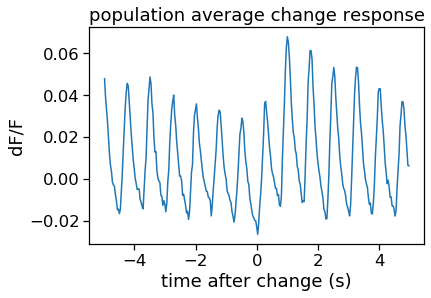

In [42]:
# popuation average response to image change
times = trials_response_df.trace_timestamps.values[0]
plt.plot(times, trials_response_df.trace.mean())
plt.title('population average change response')
plt.xlabel('time after change (s)')
plt.ylabel('dF/F')

### Get omission triggered responses 

In [43]:
# this creates a dataframe with the response of every cell for every omission
# cell response is a snippet of the trace in a [-.5, 0.75] second window around the omission time
omission_response_df = analysis.get_response_df(df_name='omission_response_df')

In [44]:
omission_response_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,epoch
0,13,992902634,"[0.06147743803837265, 0.09811394600566481, -0....","[-4.9768954704012, -4.944577967346647, -4.9122...",-0.022100,0.081356,0.9397,0.6861,0.8978,NaN,NaN,8,omitted,True,18570,315.611458,NaN,False,0
1,13,992902619,"[0.035646207486238396, 0.09467837212364097, -0...","[-4.9768954704012, -4.944577967346647, -4.9122...",0.004468,0.022521,0.4312,0.3168,0.4275,NaN,NaN,8,omitted,True,18570,315.611458,NaN,False,0
2,13,992902622,"[0.03751269891512046, 0.031581023467236055, -0...","[-4.9768954704012, -4.944577967346647, -4.9122...",-0.045896,0.105504,0.9986,0.7910,0.9679,NaN,NaN,8,omitted,True,18570,315.611458,NaN,False,0
3,13,992902667,"[0.0965439604768864, 0.08151458477178207, -0.0...","[-4.9768954704012, -4.944577967346647, -4.9122...",-0.010811,0.012836,0.8854,0.5734,0.8752,NaN,NaN,8,omitted,True,18570,315.611458,NaN,False,0
4,13,992902649,"[0.01413418952678909, 0.017499694952640088, -0...","[-4.9768954704012, -4.944577967346647, -4.9122...",-0.050514,-0.007053,0.9996,0.9497,0.9986,NaN,NaN,8,omitted,True,18570,315.611458,NaN,False,0


In [45]:
omission_response_df.keys()

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_gray_screen', 'p_value_omission', 'p_value_stimulus',
       'duration', 'end_frame', 'image_index', 'image_name', 'omitted',
       'start_frame', 'start_time', 'stop_time', 'change', 'epoch'],
      dtype='object')

Text(0, 0.5, 'dF/F')

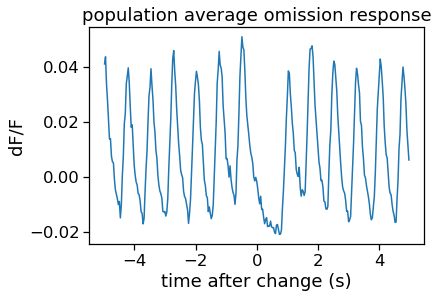

In [46]:
# popuation average response
times = omission_response_df.trace_timestamps.values[0]
plt.plot(times, omission_response_df.trace.mean())
plt.title('population average omission response')
plt.xlabel('time after change (s)')
plt.ylabel('dF/F')

### Get running behavior for omissions 

In [47]:
# similar functionality exist for pupil area

In [48]:
# this creates a dataframe with the running speed for every stimulus presentation
# trace is a snippet of the run speed in a [-.5, 0.75] second window around stim onset
run_speed_df = analysis.get_response_df(df_name='omission_run_speed_df')

In [49]:
run_speed_df.head()

,index,stimulus_presentations_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,epoch
0,0,13,"[-0.00016060630793646145, 0.5354614350559986, ...","[-4.987550032383085, -4.970869263044011, -4.95...",0.534435,0.103630,0.4292,0.4599,0.4350,NaN,NaN,8,omitted,True,18570,315.611458,NaN,False,0
1,2,16,"[-0.3437265019526322, 0.0, -1.032246505591008,...","[-4.987550032383085, -4.970869263044011, -4.95...",0.878759,0.606875,0.3966,0.3750,0.3477,NaN,NaN,8,omitted,True,18705,317.863278,NaN,False,0
2,4,65,"[-0.5682678530338965, 0.0, 0.26821311521739294...","[-4.987550032383085, -4.970869263044011, -4.95...",0.418636,0.565243,0.4499,0.4840,0.4823,NaN,NaN,8,omitted,True,20910,354.643648,NaN,False,0
3,6,83,"[4.498058470411964, 4.494026760860603, 4.67906...","[-4.987550032383085, -4.970869263044011, -4.95...",0.140254,0.278003,0.5925,0.6905,0.6702,NaN,NaN,8,omitted,True,21720,368.154328,NaN,False,0
4,8,112,"[-0.4557277514262342, -1.4477480731869061, -0....","[-4.987550032383085, -4.970869263044011, -4.95...",0.332757,-0.103283,0.4704,0.5363,0.5254,NaN,NaN,8,omitted,True,23025,389.922088,NaN,False,0


Text(0, 0.5, 'run speed (cm/s)')

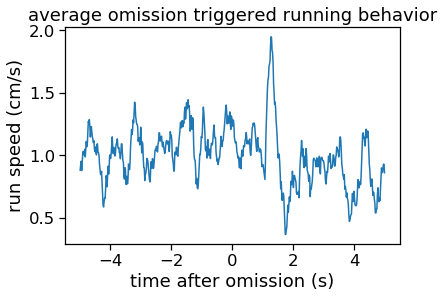

In [50]:
# running speed averaged across all omissions
times = run_speed_df.trace_timestamps.values[0]
plt.plot(times, run_speed_df.trace.mean())
plt.title('average omission triggered running behavior')
plt.xlabel('time after omission (s)')
plt.ylabel('run speed (cm/s)')

## get trial averaged response dataframe for some set of conditions 

VBA <code>response_analysis.utilities</code> has a function for averaging across trials for a given set of conditions: the <code>get_mean_df()</code> function

In [51]:
import visual_behavior.ophys.response_analysis.utilities as utilities

In [52]:
help(utilities.get_mean_df) # needs documentation...

Help on function get_mean_df in module visual_behavior.ophys.response_analysis.utilities:

get_mean_df(response_df, analysis=None, conditions=['cell', 'change_image_name'], flashes=False, omitted=False, get_reliability=True, get_pref_stim=True, exclude_omitted_from_pref_stim=True)



In [53]:
conditions = ['cell_specimen_id', 'image_name'] # conditions to groupby before averaging
mean_df = utilities.get_mean_df(stim_response_df, conditions=conditions, flashes=True)

must provide analysis object to get_mean_df to compute reliability


In [54]:
mean_df.head()

,cell_specimen_id,image_name,mean_response,sem_response,mean_trace,sem_trace,mean_responses,mean_baseline,sem_baseline,pref_stim,fraction_significant_p_value_gray_screen,fraction_significant_p_value_omission,fraction_significant_p_value_stimulus
0,992902610,im061,0.018958,0.001573,"[0.058872061780354444, 0.05138391212826471, 0....","[0.00370197924587146, 0.0034974144274466123, 0...","[0.0036268214358501734, 0.13944951742997472, 0...",-0.021492,0.001324,False,0.273345,0.421053,0.037351
1,992902610,im062,0.033404,0.002743,"[0.08306927150626427, 0.08526279749068161, 0.0...","[0.005519338900810428, 0.005177066580588507, 0...","[-0.02392596034673746, 0.00845526016713901, 0....",-0.019322,0.001996,True,0.379245,0.484906,0.133962
2,992902610,im063,0.007894,0.000866,"[0.027186728000039476, 0.018352709413017133, 0...","[0.002772098306642578, 0.0026699980707104933, ...","[0.008744712535756797, 0.020758640342032657, 0...",-0.011394,0.001081,False,0.114679,0.292049,0.001529
3,992902610,im065,0.022101,0.002025,"[0.0455716524699372, 0.04208194785666107, 0.04...","[0.004074824042247801, 0.00389590430182417, 0....","[0.006816229003447735, 0.034424611020797295, 0...",-0.020504,0.002048,False,0.310000,0.438333,0.048333
4,992902610,im066,0.018859,0.001694,"[0.0490406622024347, 0.0468189239810095, 0.037...","[0.003905212882222808, 0.003986599834452291, 0...","[0.00705282651318867, 0.11928168150913265, 0.0...",-0.018818,0.001688,False,0.298077,0.463462,0.036538


The resulting dataframe includes useful columns such as <code>pref_stim</code> which indicates the stimulus that evoked the maximal response across conditions for that cell, or  <code>fraction_significant_p_value_gray_screen</code> which tells you the fraction of trials for the given condition that had a significant p_value compared to the gray screen periods, or <code>mean_responses</code> which has an array of the mean response value for all trials of a given condition (useful for things like computing variability or noise correlations)

### plot mean trace for a cells preferred stimulus

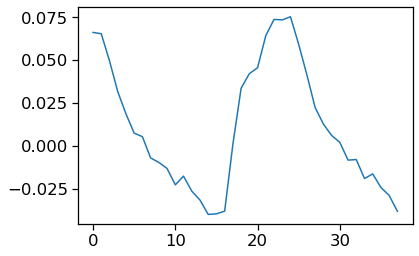

In [57]:
mean_trace = mean_df[(mean_df.cell_specimen_id==cell_specimen_id)&(mean_df.pref_stim==True)].mean_trace.values[0]
plt.plot(mean_trace)